# Домашнее задание 

## Импорт необходимых библиотек

In [1]:
import numpy as np
import time
import threading
import psutil
import matplotlib.pyplot as plt
import random
import inspect
import sys
import os

## Задание 1 
### Ускорение преобразования Фурье

### 1.1 Преобразование Фурье

In [5]:
# Задаем случайную последовательность
data = np.random.rand(4096)

# Время начала преобразования
start_time = time.time_ns()
# Преобразование Фурье
data_fft = np.fft.fft(data)
# Время окончания преобразования
end_time = time.time_ns()


print(f'Время выполнения преобразования Фурье: {end_time - start_time}')

Время выполнения преобразования Фурье: 634000


### 1.2 Два последовательных преобразования Фурье

In [3]:
# Задаем 2 случайные последовательности
data1 = np.random.rand(4096)
data2 = np.random.rand(4096)

start_time = time.time_ns()

data1_fft = np.fft.fft(data1)

start_time1 = time.time_ns()

data2_fft =np.fft.fft(data2)

end_time = time.time_ns()

print(f'Время выполнения первого преобразования Фурье: {start_time1 - start_time}')
print(f'Время выполнения второго преобразования Фурье: {end_time - start_time1}')
print(f'Время выполнения преобразования Фурье двух последовательностей: {end_time - start_time}')
 

Время выполнения первого преобразования Фурье: 532000
Время выполнения второго преобразования Фурье: 509000
Время выполнения преобразования Фурье двух последовательностей: 1041000


### 1.3 Создание двух отдельных поток

In [6]:
# Задаем 2 случайные последовательности
data1 = np.random.rand(4096)
data2 = np.random.rand(4096)

# Функция для выполнения преобразования Фурье в отдельном потоке
def threaded_fft(data):
    start_time = time.time()
    results =  np.fft.fft(data)
    end_time = time.time()
    print(f'Время выполнения преобразования Фурье: {end_time - start_time}')
    
# Создание и запуск потоков
thread1 = threading.Thread(target=threaded_fft(data1))
thread2 = threading.Thread(target=threaded_fft(data2))
    
start_time = time.time()
thread1.start()
thread2.start()

thread1.join()
thread2.join()
end_time = time.time()




print(f"Время выполнения Фурье-преобразования для двух последовательностей в потоках: {end_time - start_time}")

Время выполнения преобразования Фурье: 0.0003628730773925781
Время выполнения преобразования Фурье: 0.00046515464782714844
Время выполнения Фурье-преобразования для двух последовательностей в потоках: 0.001383066177368164


### Тот же код на другом компьютере  
![Тот же код на другом компьютере](https://i.ibb.co/ncHN01M/2024-10-30-20-58-58.jpg)

### Вывод  
1. Общее время выполнения двух последовательных преобразований Фурье - сумма времени выполнения преобразования Фурье каждой последовательности. Это время примерно в 2 раза больше, чем для одной последовательности, так как операции выполняются одна за одной.  
2. Если процессор поддерживает многопоточность и имеет несколько ядер, то время выполнения будет меньше, чем в случае последовательного выполнения. В нашем случае - процессор не поддерживает многопоточность, но на другом ПК многопоточность реализована. Общее время будет примерно равно времени выполнения для одной последовательности, так как операции будут выполняться параллельно.  

## Задание 2  
### Ускорение ожидания преобразования Фурье

### 2.1 Программа с синхронным "зависанием" после преобразования Фурье

In [7]:
# Задаем случайную последовательность
data = np.random.rand(4096)

# Запускаем таймер
start_time = time.time()

# Выполняем Фурье-преобразование
data_fft = np.fft.fft(data)

# Зависаем на 2 секунды
time.sleep(2)

end_time = time.time()
print(f'Время выполнения команды: {end_time - start_time}')

Время выполнения команды: 2.0063459873199463


### 2.2 Многопоточность

In [8]:
def fft_with_sleep():
    sequence = np.random.rand(4096)
    start_time = time.time()
    fft_result = np.fft.fft(sequence)
    time.sleep(2)
    end_time = time.time()
    print(f"FFT with sleep: {end_time - start_time}")

# Функция для выполнения Фурье-преобразования без ожидания
def fft_without_sleep():
    data = np.random.rand(4096)
    start_time = time.time()
    fft_result = np.fft.fft(data)
    end_time = time.time()
    result_time = end_time - start_time
    print(f"FFT without sleep: {end_time - start_time}")

# Создаем потоки
thread1 = threading.Thread(target=fft_with_sleep)
thread2 = threading.Thread(target=fft_without_sleep)

start_time = time.time()
thread1.start()
thread2.start()
thread1.join()
thread2.join()
end_time = time.time()

print(f"Общее время выполнения двух потоков: {end_time - start_time}")

FFT without sleep: 0.00043892860412597656
FFT with sleep: 2.002013921737671
Общее время выполнения двух потоков: 2.004539966583252


### Вывод  
1. В пункте 2.1 программа выполняет преобразование Фурье и ожидание в одном потоке, поэтому общее время будет включать время ожидания.
2.  В пункте 2.2 один поток выполняет преобразование Фурье и ожидание, а другой поток выполняет только преобразование Фурье. Общее время будет примерно равно времени выполнения преобразования Фурье + 2 секунды для потока с ожиданием, так как поток без ожидания завершится быстрее.
3.  В пункте 1.3 оба потока выполняют только преобразование Фурье, что позволяет им завершиться параллельно, сокращая общее время выполнения. В пункте 2.2 один поток выполняет преобразование Фурье и ожидание, что увеличивает общее время выполнения.

## Задание 3
### Исследование объёма динамической памяти

### 3.1 List

In [2]:
# Создание пустого списка
my_list = []

# Заполнение списка числами от 1 до 4096
for i in range(1, 4097):
    my_list.append(i)

### 3.2. Замер используемой процессом памяти

In [8]:
# Создание пустого списка
my_list = []

# Замер используемой памяти
process = psutil.Process(os.getpid())

# Заполнение списка числами от 1 до 4096 и замер памяти
memory_usage = []
for i in range(1, 4097):
    my_list.append(i)
    memory_usage.append(process.memory_info().rss/1024/1024)

### 3.3. Построение зависимости используемой памяти от номера итерации цикла

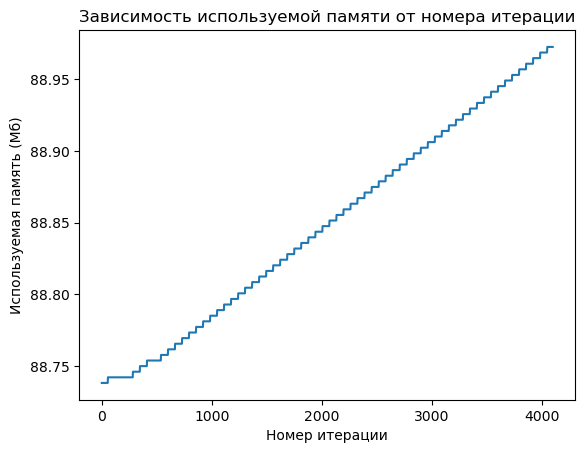

In [9]:
# Построение графика зависимости используемой памяти от номера итерации
plt.plot(range(1, 4097), memory_usage)
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (Мб)')
plt.title('Зависимость используемой памяти от номера итерации')
plt.show()

### Вывод  
1. Линейный рост: В большинстве случаев, используемая память будет расти линейно с каждым добавлением элемента в список, так как каждый элемент занимает определенный объем памяти.
2. Реаллокация памяти: В некоторых случаях, Python может реаллоцировать память для списка, чтобы оптимизировать использование памяти. Это может привести к небольшим скачкам в использовании памяти.

### 3.4. Dict

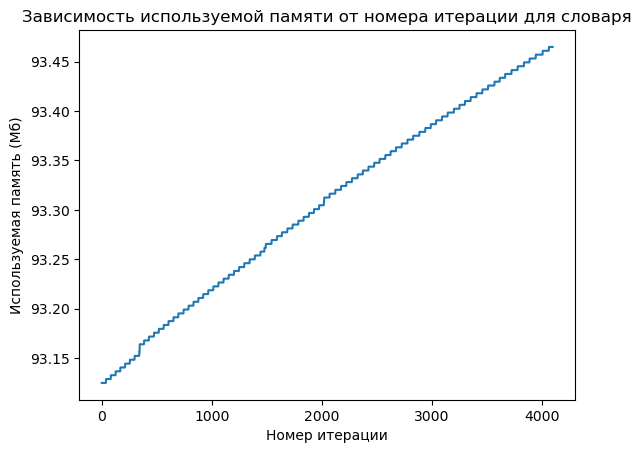

In [10]:
my_dict = {}

# Замер используемой памяти
process = psutil.Process(os.getpid())

# Заполнение словаря случайными числами и замер памяти
memory_usage_dict = []
for i in range(1, 4097):
    key = random.randint(1, 10000)
    value = random.randint(1, 10000)
    my_dict[key] = value
    memory_usage_dict.append(process.memory_info().rss/1024/1024)

plt.plot(range(1, 4097), memory_usage_dict)
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (Мб)')
plt.title('Зависимость используемой памяти от номера итерации для словаря')
plt.show()

### Вывод  
1. Линейный рост: В большинстве случаев, используемая память будет расти линейно с каждым добавлением элемента в словарь, так как каждый элемент занимает определенный объем памяти.
2. Реаллокация памяти (процесс изменения местоположения данных в памяти компьютера): В некоторых случаях, Python может реаллоцировать память для словаря, чтобы оптимизировать использование памяти. Это может привести к небольшим скачкам в использовании памяти.
3. Разница между списком и словарем: Словарь может потреблять немного больше памяти, чем список, из-за дополнительных накладных расходов на хранение ключей и значений.  

## Задание 4  
### Переполнение стек вызовов

### 4.1. Заполнение списка с использованием рекурсии

In [11]:
# Рекурсивный метод
def fill_list_recursive(n, current=4096):
    if current == 0:
        return []
    else:
        return [current] + fill_list_recursive(n, current - 1)

### 4.2. Замер времени исполнения

In [ ]:
# Метод с использованием цикла
def fill_list_loop(n):
    result = []
    for i in range(n, 0, -1):
        result.append(i)
    return result
    
# Увеличиваем лимит рекурсии для больших списков
sys.setrecursionlimit(5000)


# Замер времени для рекурсии
start_time = time.time()
result_recursive = fill_list_recursive(4096)
end_time = time.time()
res_time_rec = end_time - start_time
print(f"Время выполнения рекурсии: {res_time_rec} секунд")


# Замер времени для цикла
start_time = time.time()
result_loop = fill_list_loop(4096)
end_time = time.time()
res_time_loop = end_time - start_time
print(f"Время выполнения цикла: {res_time_loop} секунд")

Глубина стека вызовов: 23
Глубина стека вызовов: 24
Глубина стека вызовов: 25
Глубина стека вызовов: 26
Глубина стека вызовов: 27
Глубина стека вызовов: 28
Глубина стека вызовов: 29
Глубина стека вызовов: 30
Глубина стека вызовов: 31
Глубина стека вызовов: 32
Глубина стека вызовов: 33
Глубина стека вызовов: 34
Глубина стека вызовов: 35
Глубина стека вызовов: 36
Глубина стека вызовов: 37
Глубина стека вызовов: 38
Глубина стека вызовов: 39
Глубина стека вызовов: 40
Глубина стека вызовов: 41
Глубина стека вызовов: 42
Глубина стека вызовов: 43
Глубина стека вызовов: 44
Глубина стека вызовов: 45
Глубина стека вызовов: 46
Глубина стека вызовов: 47
Глубина стека вызовов: 48
Глубина стека вызовов: 49
Глубина стека вызовов: 50
Глубина стека вызовов: 51
Глубина стека вызовов: 52
Глубина стека вызовов: 53
Глубина стека вызовов: 54
Глубина стека вызовов: 55
Глубина стека вызовов: 56
Глубина стека вызовов: 57
Глубина стека вызовов: 58
Глубина стека вызовов: 59
Глубина стека вызовов: 60
Глубина стек

### 4.3. Исследование размера стека вызовов

In [13]:
import inspect

def fill_list_recursive(n, current=4096):
    # Вывод размера стека вызовов
    print(f"Глубина стека вызовов: {len(inspect.stack())}")
    
    if current == 0:
        return []
    else:
        return [current] + fill_list_recursive(n, current - 1)

# Пример использования
result = fill_list_recursive(4096)

Глубина стека вызовов: 23
Глубина стека вызовов: 24
Глубина стека вызовов: 25
Глубина стека вызовов: 26
Глубина стека вызовов: 27
Глубина стека вызовов: 28
Глубина стека вызовов: 29
Глубина стека вызовов: 30
Глубина стека вызовов: 31
Глубина стека вызовов: 32
Глубина стека вызовов: 33
Глубина стека вызовов: 34
Глубина стека вызовов: 35
Глубина стека вызовов: 36
Глубина стека вызовов: 37
Глубина стека вызовов: 38
Глубина стека вызовов: 39
Глубина стека вызовов: 40
Глубина стека вызовов: 41
Глубина стека вызовов: 42
Глубина стека вызовов: 43
Глубина стека вызовов: 44
Глубина стека вызовов: 45
Глубина стека вызовов: 46
Глубина стека вызовов: 47
Глубина стека вызовов: 48
Глубина стека вызовов: 49
Глубина стека вызовов: 50
Глубина стека вызовов: 51
Глубина стека вызовов: 52
Глубина стека вызовов: 53
Глубина стека вызовов: 54
Глубина стека вызовов: 55
Глубина стека вызовов: 56
Глубина стека вызовов: 57
Глубина стека вызовов: 58
Глубина стека вызовов: 59
Глубина стека вызовов: 60
Глубина стек

KeyboardInterrupt: 

In [14]:
print(f"Время на накладные расходы: {res_time_rec - res_time_loop} секунд")

Время на накладные расходы: 0.058567047119140625 секунд


### Вывод  
1. Рекурсивный метод обычно медленнее, чем цикл, из-за накладных расходов на вызов функций и управление стеком вызовов. В приведенном примере, если рекурсия выполняется 4096 раз, накладные расходы на вызов функции и управление стеком могут быть значительными.  
2. При каждом рекурсивном вызове глубина стека увеличивается на 1.